In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from copy import deepcopy
from os.path import join, isdir
import json
import pandas as pd
import pickle
from scipy.io import wavfile
from syllable_cluster import *

from ipywidgets.widgets import FloatProgress
from IPython.display import display

import sys

sys.path.append('../model')

from song_model import SongModel

sns.set_palette('colorblind')
%matplotlib inline

In [2]:

progress = FloatProgress(min=0, max=1)
display(progress)
main_path = '../model/res/microbial_prio_170428_141840/10_conc+slow_dev+prior_amp_entropy+big_ba+50_replay+seed{}+on_alpha_silence_beta/'
all_dat = []

for seed in range(40):
    if not  isdir(main_path.format(seed)):
        #print(seed)
        continue
    path = main_path.format(seed)
    cur_dat = syllables_from_run(path, force=False, progress=progress)
    cur_dat['bird'] = seed
    all_dat.append(cur_dat)
    seed += 1
all_dat = pd.concat(all_dat)

sr, tutor = wavfile.read(join(main_path.format(0), 'tutor.wav'))
tutor_syllables = extract_syllables_statistics(tutor)

In [33]:
first_day = 5
last_day = first_day + 5
beg = tutor_syllables[0]['beg'] - 10
end = tutor_syllables[0]['end'] + 10
plot_dat = all_dat.query("((bird == {bird}) and ( \
                         (beg > {beg} and end < {end}) and day % 10 == 0))".format(
    first_day=first_day,
    last_day=last_day,
    bird=0,
    beg=tutor_syllables[0]['beg'] - 10,
    end=tutor_syllables[0]['end'] + 10
))
tutor_df = pd.DataFrame(tutor_syllables)
tutor_df['day'] = 100
plot_dat = pd.concat((plot_dat, tutor_df.query("beg > {beg} and end < {end}".format(beg=beg, end=end))))
plot_dat

,beg,bird,comb,day,end,isong,isyb,length,mam,mamplitude,...,mgoodness,moment,mpitch,run_name,vam,vamplitude,ventropy,vfm,vgoodness,vpitch
6,102,0.0,0.5,0,179,2.0,0,77,-0.000425,-0.021167,...,2.964864,evening,0.761177,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,1.804403,0.287372,0.045522,1.713712,2.970188,4.882455e-04
595,110,0.0,10.0,10,178,0.0,0,68,-0.000100,-1.464809,...,-0.106509,morning,0.705536,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.041369,0.389210,0.040250,1.448421,2.326272,1.994089e-01
604,110,0.0,10.0,10,178,1.0,0,68,-0.000112,-1.878528,...,-0.108292,morning,0.705537,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.012037,0.389210,0.040250,1.448421,2.331180,1.994089e-01
613,110,0.0,10.0,10,178,2.0,0,68,-0.000100,-1.464809,...,-0.106104,morning,0.705536,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.041369,0.389210,0.040250,1.448421,2.324383,1.994089e-01
623,110,0.0,10.5,10,179,0.0,1,69,-0.000136,-1.549396,...,-0.431862,evening,0.704362,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.036369,0.543588,0.061135,1.409653,2.058590,1.959930e-01
632,110,0.0,10.5,10,181,1.0,0,71,-0.000090,-1.436677,...,-1.200926,evening,0.774463,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.245063,0.384717,0.230380,1.598151,2.094795,2.036406e-01
641,110,0.0,10.5,10,180,2.0,0,70,-0.000123,-1.261003,...,-0.892105,evening,0.630086,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.106688,0.291449,0.112914,1.553304,1.373101,5.355718e-01
1199,110,0.0,20.0,20,180,0.0,0,70,-0.000118,-1.814887,...,-0.505504,morning,0.298621,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.030849,0.437409,0.112731,1.470225,1.435123,1.785676e+00
1208,110,0.0,20.0,20,180,1.0,0,70,-0.000116,-1.791993,...,-0.460618,morning,0.289910,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.031623,0.411409,0.116662,1.508844,1.371386,1.879970e+00
1217,110,0.0,20.0,20,180,2.0,0,70,-0.000117,-1.799242,...,-0.486141,morning,0.289782,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0.031635,0.424432,0.114674,1.490864,1.400864,1.879956e+00


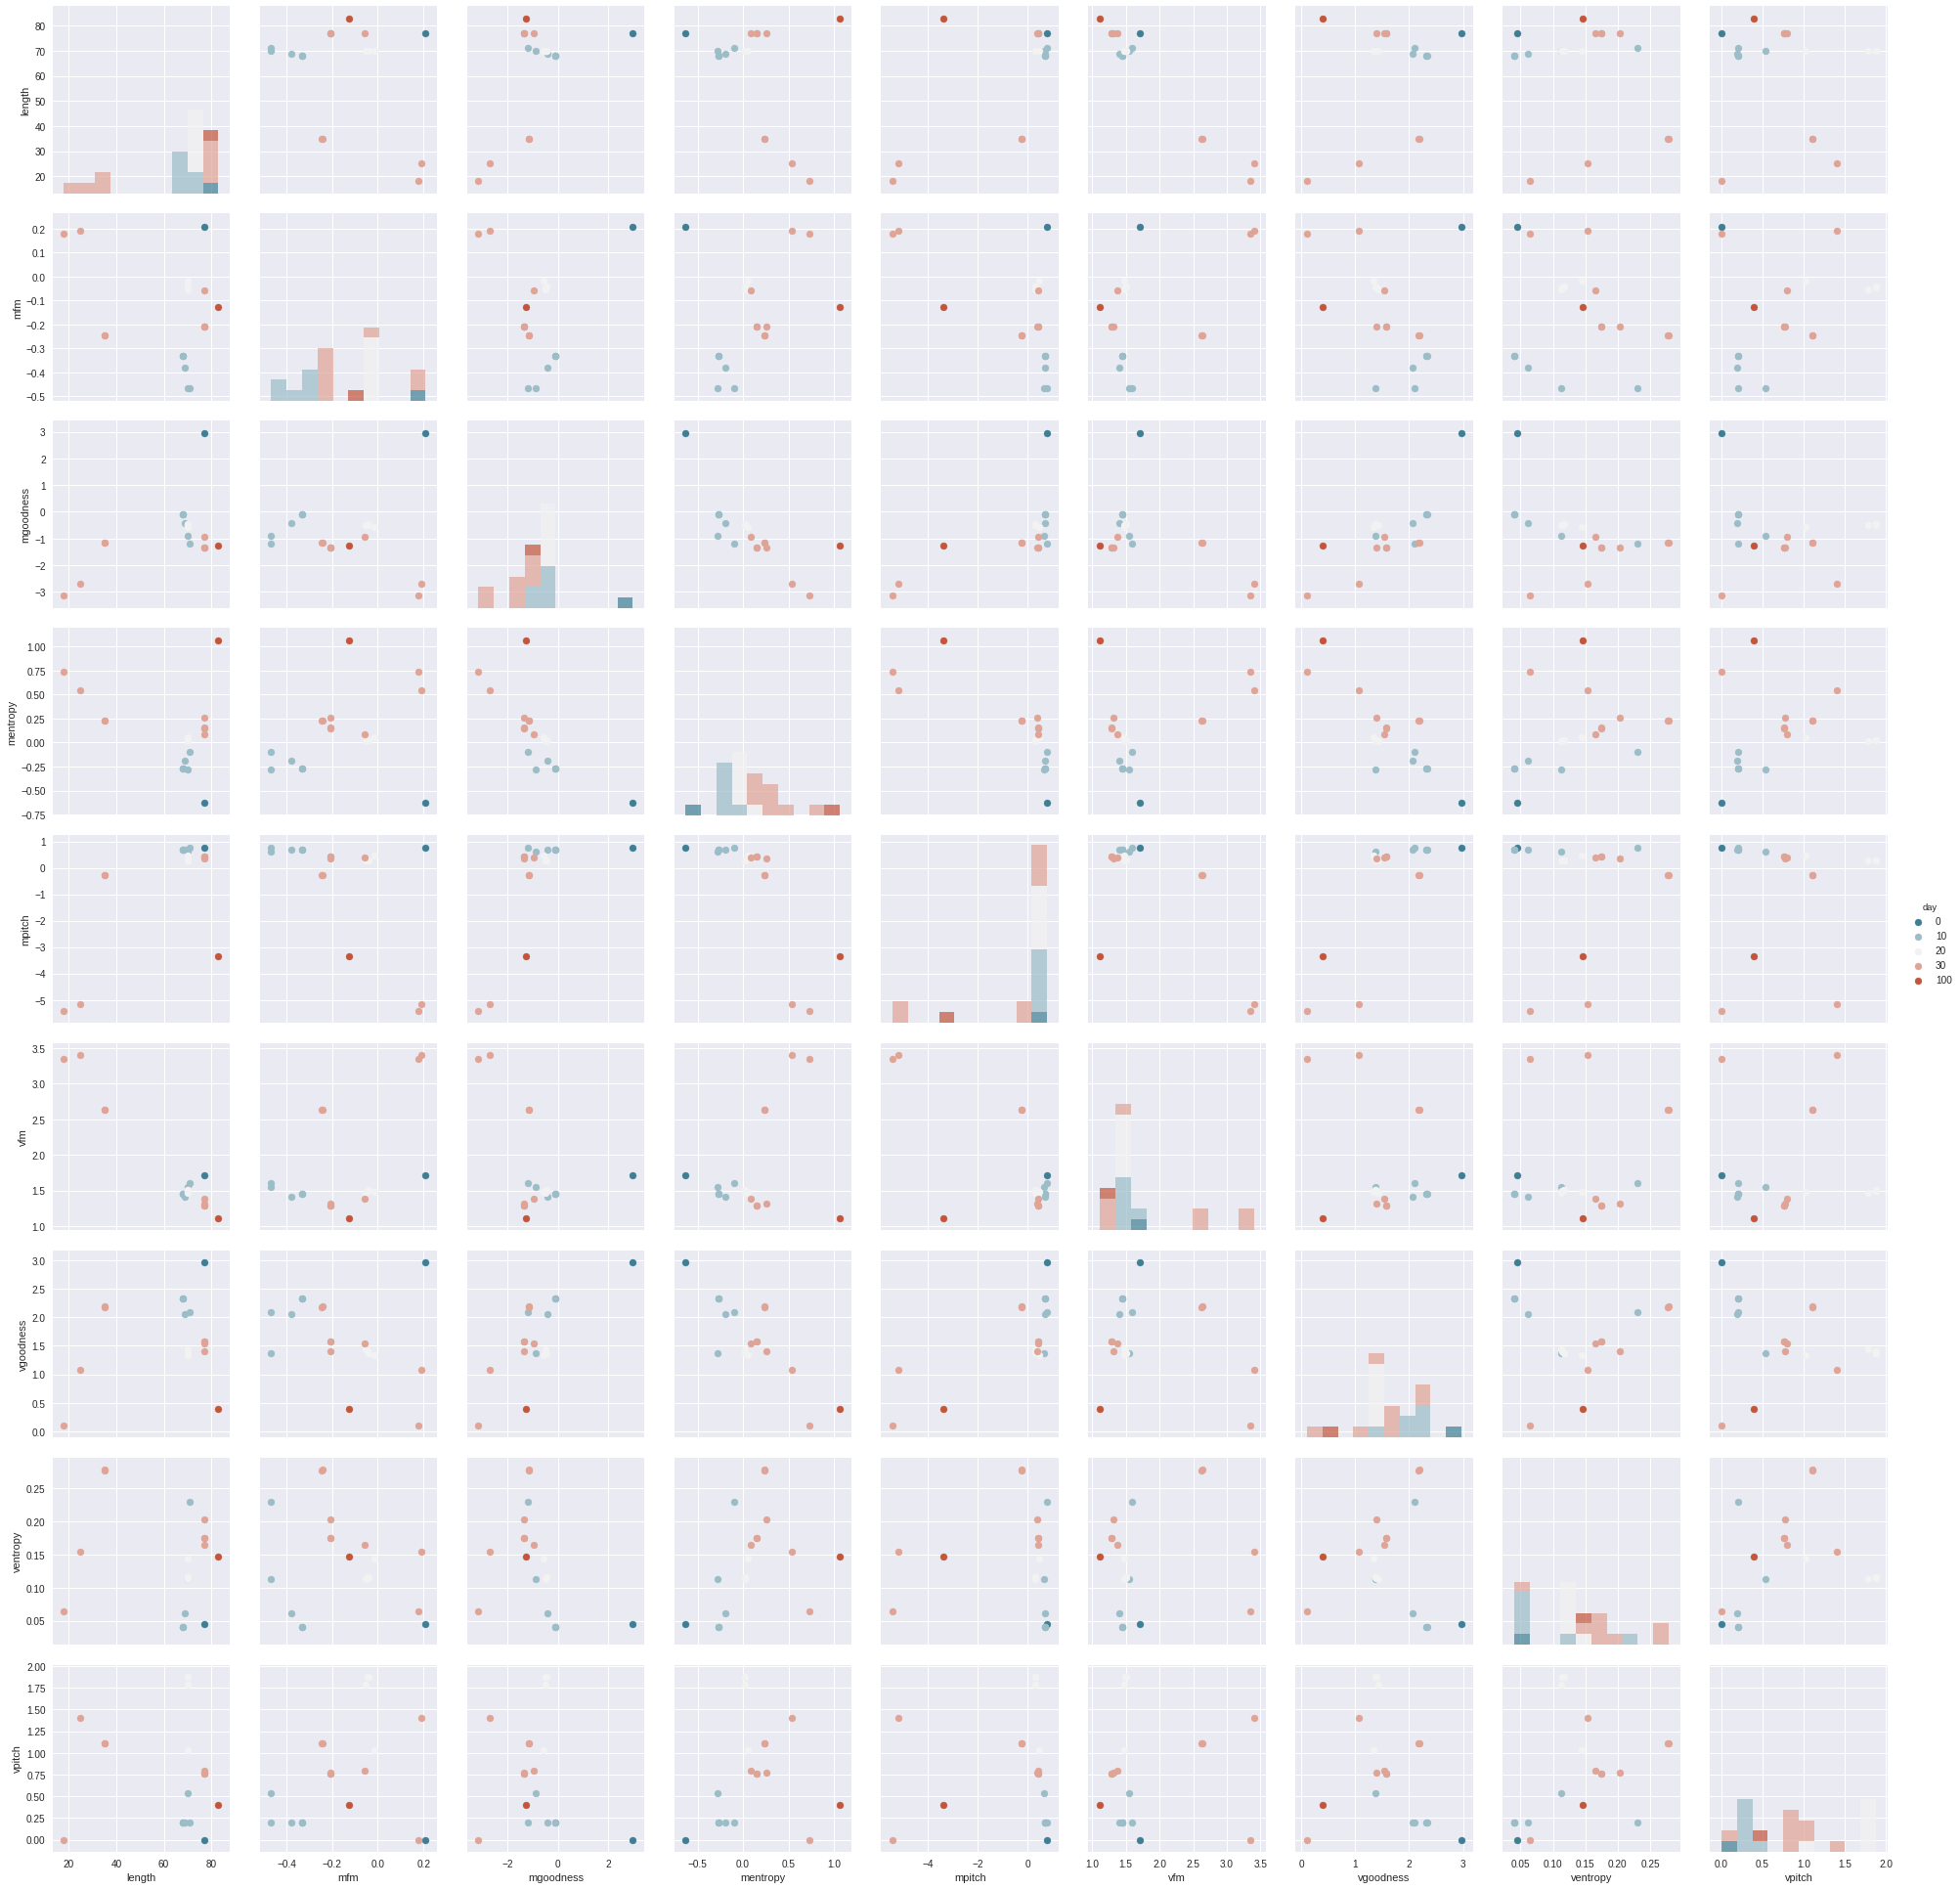

In [37]:
g = sns.PairGrid(plot_dat, hue="day", vars=['length', 'mfm', 'mgoodness', 'mentropy', 'mpitch',
                                            'vfm', 'vgoodness', 'ventropy', 'vpitch'], size=3, palette=sns.diverging_palette(220, 20, n=5))
g.map_diag(plt.hist, alpha=0.7)
g.map_offdiag(plt.scatter, alpha=1)
#g.map_offdiag(sns.kdeplot, alpha=0.3)
g.add_legend()


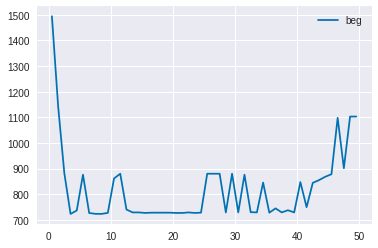

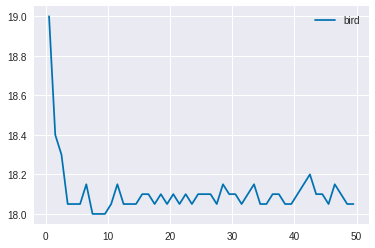

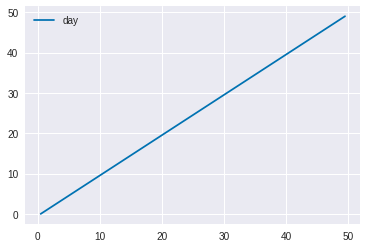

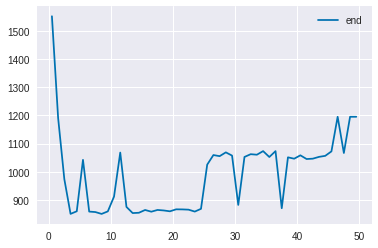

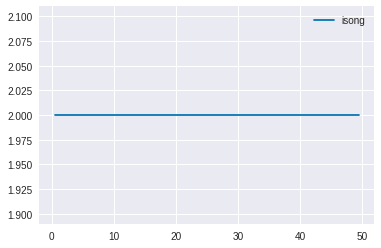

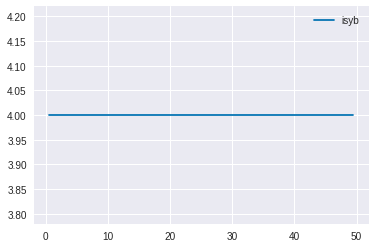

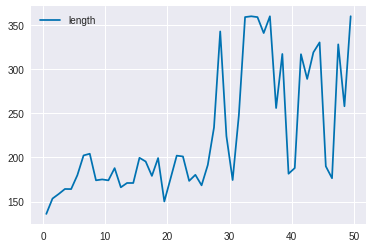

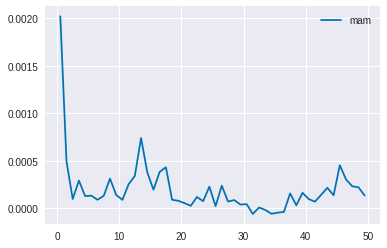

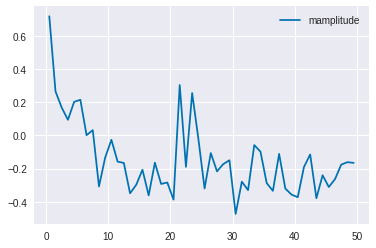

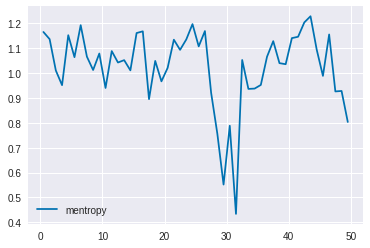

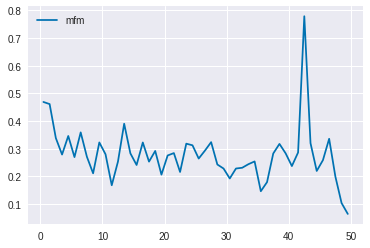

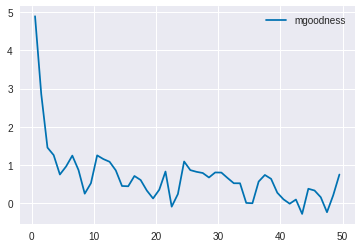

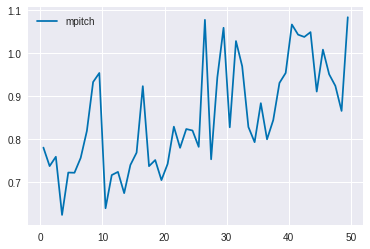

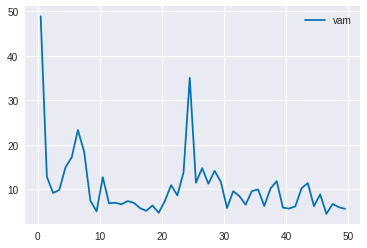

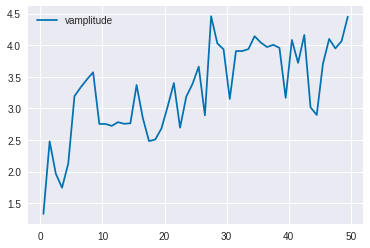

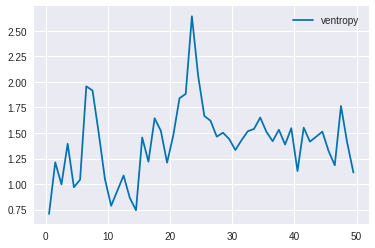

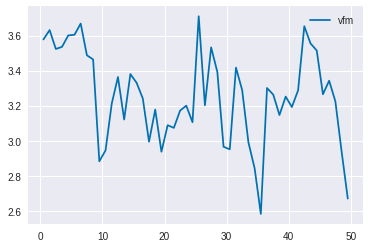

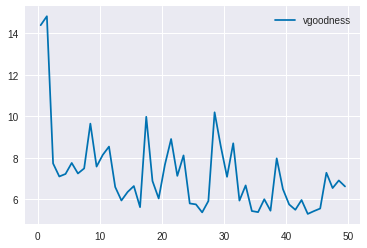

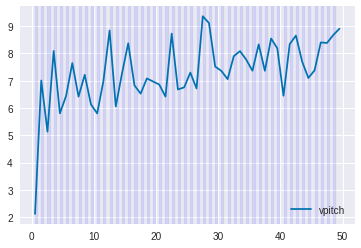

In [5]:
plt.figure(figsize=(14, 14))
med = all_dat[all_dat.beg > ].query('moment == "evening"').groupby('comb').quantile(0.95)
for item in med.keys():
    plt.figure()
    plt.plot(med[item], label=item)
    plt.legend()
for day in range(np.max(all_dat['day'])):
    plt.axvspan(day+0.5, day+1, color='b', alpha=0.1)

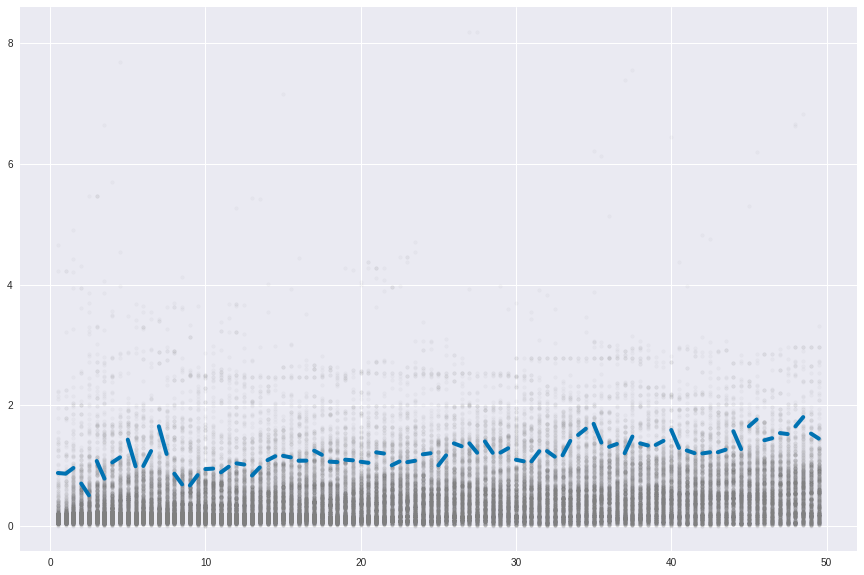

In [6]:
plt.figure(figsize=(15, 10))

feat = 'ventropy'

splitted = all_dat[all_dat.isyb == 3].groupby('comb')[feat].quantile(0.95)
for i in splitted.index:
    if i % 1 == 0:
        splitted.set_value(i + 0.75, np.nan)
splitted.sort_index(inplace=True)


plt.scatter(all_dat['comb'], all_dat[feat], marker='.', alpha=0.05, color="grey")
plt.plot(splitted, linewidth=4)

(-50, 50)

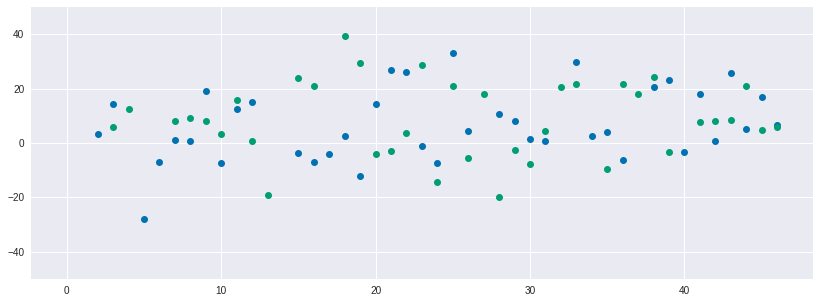

In [7]:
means = []
for day in range(1, np.max(all_dat['day']) - 1):
    last_day = all_dat[((all_dat.day == np.max(all_dat['day'])) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day + 1) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night, last_day)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means.append(mean)
means = np.array(means)


means_sd = [] # means same day
for day in range(1, np.max(all_dat['day']) - 1):
    last_day = all_dat[((all_dat.day == np.max(all_dat['day'])) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night, last_day)
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means_sd.append(mean)
means_sd = np.array(means_sd)

plt.figure(figsize=(14, 5))
plt.plot(means, 'o')
plt.plot(means_sd, 'o')
plt.ylim((-50,50))

In [8]:
all_dat

,beg,comb,day,end,isong,isyb,length,mam,mamplitude,mentropy,...,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch,run_name,bird
0,380,0.5,0,450,0,0,70,0.000926,0.257774,-0.891144,...,evening,0.787316,3.899792e+00,0.376675,0.387067,1.698930,10.833507,1.818137e-02,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
1,1163,0.5,0,1236,0,1,73,0.001012,-0.322576,-0.329749,...,evening,0.697030,4.270079e-01,0.183349,0.042598,1.055577,4.105322,3.580601e-01,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
2,1242,0.5,0,1282,0,2,40,0.007837,0.167497,-0.381017,...,evening,0.772894,9.222775e+00,0.405394,0.056322,1.633772,1.843721,6.499715e-04,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
3,381,0.5,0,442,1,0,61,0.011440,0.365528,-0.622720,...,evening,0.520897,9.354968e+00,0.145129,0.157788,1.318823,8.856451,8.028530e-02,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
4,493,0.5,0,512,1,1,19,-0.008125,-0.542850,1.227438,...,evening,0.903185,1.610777e+00,0.012023,0.052870,3.681705,0.015483,1.990411e-09,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
5,724,0.5,0,770,1,2,46,0.004356,-0.500316,-0.184149,...,evening,0.765617,1.722086e-01,0.028821,0.048447,0.502984,1.213613,2.113375e-04,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
6,102,0.5,0,179,2,0,77,-0.000425,-0.021167,-0.631936,...,evening,0.761177,1.804403e+00,0.287372,0.045522,1.713712,2.970188,4.882455e-04,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
7,435,0.5,0,496,2,1,61,-0.000029,0.268350,-0.553949,...,evening,0.534769,5.962717e+00,0.623971,0.106936,1.802660,4.354423,6.403020e-01,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
8,882,0.5,0,1015,2,2,133,-0.000065,0.578309,-0.941244,...,evening,0.723271,5.599076e+00,0.368568,0.077332,1.062591,2.756105,1.842181e-01,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
9,1441,0.5,0,1519,2,3,78,-0.000671,0.078567,-1.365607,...,evening,0.789604,1.239704e+00,0.303897,0.522825,1.640227,11.576542,5.633929e-03,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0


In [9]:
means

array([-109.27756597,   53.44708317,    3.35138008,   14.20623991,
       -113.90071651,  -28.15122427,   -7.12993535,    1.13438899,
          0.64450415,   18.95093842,   -7.27546247,   12.45439062,
         15.10700795,   63.61219784,  167.09667296,   -3.63438053,
         -7.14493933,   -4.22918599,    2.40010103,  -12.08975928,
         14.19499805,   26.94722294,   26.02991243,   -0.97639605,
         -7.36310233,   33.09917951,    4.24853676,  -61.24110735,
         10.72851953,    8.00897766,    1.4038725 ,    0.66194327,
        138.54106797,   29.67075226,    2.44466393,    4.07879633,
         -6.43909584,  227.81800489,   20.4145508 ,   23.06757107,
         -3.18793674,   17.94801507,    0.76767234,   25.84145246,
          5.09712958,   16.84518542,    6.50573853])

In [10]:
last_day

,beg,comb,day,end,isong,isyb,length,mam,mamplitude,mentropy,...,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch,run_name,bird
3023,67,49.0,49,182,0,1,115,-0.000067,-1.554825,0.468875,...,morning,-0.223154,0.143415,1.169564,0.571345,1.979662,3.682389,4.203499,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
3034,67,49.0,49,182,1,1,115,-0.000067,-1.554826,0.468879,...,morning,-0.223154,0.143417,1.169578,0.571349,1.979233,3.681742,4.203499,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
3045,67,49.0,49,182,2,1,115,-0.000105,-1.580262,0.469825,...,morning,-0.221388,0.145242,1.339951,0.566468,1.993525,3.403324,4.200066,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,0
2801,80,49.0,49,179,0,1,99,-0.000047,-2.284234,0.839871,...,morning,-2.597330,1.477267,3.350666,0.350368,2.359458,3.628164,7.368803,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,1
2810,80,49.0,49,179,1,1,99,-0.000047,-2.284234,0.839871,...,morning,-2.597330,1.477266,3.350668,0.350368,2.358805,3.627966,7.368803,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,1
2819,80,49.0,49,179,2,1,99,-0.000047,-2.284232,0.839869,...,morning,-2.597330,1.477272,3.350654,0.350369,2.362467,3.628064,7.368802,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,1
2794,217,49.0,49,335,0,1,118,-0.000086,-0.634848,-0.776733,...,morning,0.838594,0.890224,1.870669,0.883398,1.594990,4.520524,0.767200,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,2
2800,217,49.0,49,335,1,1,118,-0.000103,-0.994450,-0.779065,...,morning,0.838595,0.304427,1.870668,0.883408,1.595004,4.512441,0.767199,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,2
2807,217,49.0,49,720,2,1,503,-0.000129,-1.137105,-0.645611,...,morning,-0.200945,3.266175,4.552847,2.173362,1.175592,4.427350,4.193822,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,2
2817,91,49.0,49,167,0,1,76,-0.000255,-0.752207,0.626287,...,morning,-0.893503,1.087695,0.350078,0.376408,2.398302,1.202859,4.978577,10_conc+slow_dev+prior_amp_entropy+big_ba+50_r...,3


(0, 100)

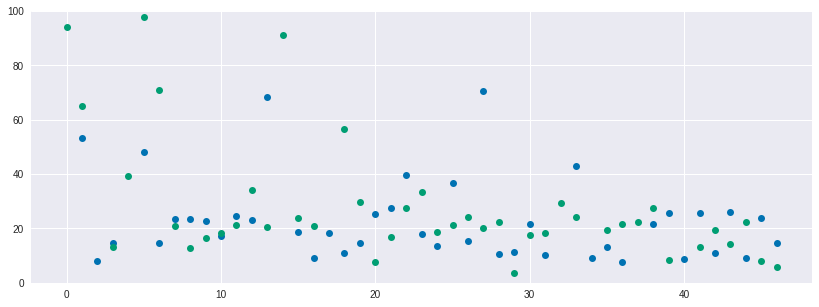

In [11]:
means = []
for day in range(1, np.max(all_dat['day']) - 1):
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day + 1) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means.append(mean)
means = np.array(means)

means_sd = [] # means same day
for day in range(1, np.max(all_dat['day']) - 1):
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means_sd.append(mean)
means_sd = np.array(means_sd)

plt.figure(figsize=(14, 5))
plt.plot(means, 'o')
plt.plot(means_sd, 'o')
plt.ylim((0, 100))

In [12]:
all_changes = []

# NIGHT

for bird_n, bird in all_dat.groupby('bird'):
    objective = bird.query('day == {}'.format(bird['day'].max()))
    for day in range(bird['day'].max()):
        first = bird.query('day == {} and moment == "evening"'.format(day))
        last  = bird.query('day == {} and moment == "morning"'.format(day+1))

        sign = np.sign(last.median() - first.median()) * np.sign(objective.median() - first.median())[[
            'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]
        percent_change = (sign * (((last.median() - first.median()) / first.median() * 100).abs())[[
            'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]).mean()
        all_changes.append({'day': day, 'bird': bird_n, 'percent_change':percent_change, 'cond': 'night'})

        
# DAY
        
for bird_n, bird in all_dat.groupby('bird'):
    objective = bird.query('day == {}'.format(bird['day'].max()))
    for day in range(bird['day'].max()):
        first = bird.query('day == {} and moment == "morning"'.format(day))
        last  = bird.query('day == {} and moment == "evening"'.format(day))
        sign = np.sign(last.median() - first.median()) * np.sign(objective.median() - first.median())[[
            'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]
        percent_change = (sign * (((last.median() - first.median()) / first.median() * 100).abs())[[
            'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]).mean()
        all_changes.append({'day': day, 'bird': bird_n, 'percent_change':percent_change, 'cond': 'day'})

In [13]:
change_df = pd.DataFrame(all_changes)

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


(-70, 70)

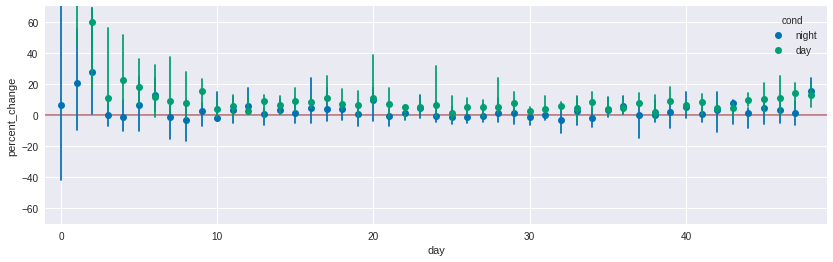

In [41]:
plt.figure(figsize=(14, 4))
plt.axhline(0, c='darkred', alpha=0.5)
sns.tsplot(change_df, time='day', unit='bird', interpolate=False, value='percent_change', condition='cond', err_style='ci_bars', ci=95, estimator=np.median)
plt.ylim((-70, 70))

In [15]:
np.where(change_df.isnull())

(array([ 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470,
        1519, 1568, 1617, 1666, 1715, 1764, 1813, 1862, 1911]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))

In [44]:
all_changes_df = pd.DataFrame(all_changes)

In [48]:
all_changes_df.query('cond == "night"').groupby('bird').mean()['percent_change']

bird
0     -9.787474
1     15.272665
2      4.045017
3     -6.005764
4     11.144944
5     -5.445300
6      3.177022
7      7.204379
8      5.380506
9      6.200423
10    32.887435
11    24.245141
12     1.502971
13    98.687231
14   -13.390554
15     2.050096
16    -9.233615
17     8.595076
18   -68.974380
19    68.058302
Name: percent_change, dtype: float64

In [65]:
night_pc = all_changes_df.query('cond == "night"').groupby('bird').mean()
sim = []
for i in night_pc.index:
    with open(join(main_path.format(i), 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)
    root_data = [item[1] for item in songlog if item[0] == 'root']
    rd = pd.DataFrame(root_data)
    smodels = rd['songs'].iloc[-1]
    print(i, 'beg')
    sim.append(bsa.similarity(smodels[0].gen_sound(), tutor)['similarity'])
    print(i)

0 beg
0
1 beg
1
2 beg
2
3 beg
3
4 beg
4
5 beg
5
6 beg
6
7 beg
7
8 beg
8
9 beg
9
10 beg
10
11 beg
11
12 beg
12
13 beg
13
14 beg
14
15 beg
15
16 beg
16
17 beg
17
18 beg
18
19 beg
19


In [71]:
night_pc['percent_change'] = -night_pc['percent_change']

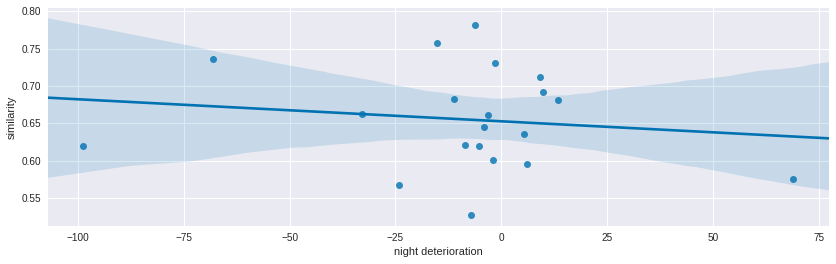

In [75]:
fig = plt.figure(figsize=(14, 4))
ax = fig.gca()
sns.regplot(x="percent_change", y='sim', data=night_pc, ax=ax)
ax.set_xlabel('night deterioration')
ax.set_ylabel('similarity')